Monte Carlo I
 - Lassen Sie eine Simulation von 30.000 Schritten bei verschiedenen Pseudotemperaturen laufen DONE
 - Finden Sie Temperaturen, bei denen das System a) fest, b) flüssig und c) gasförmig ist
 - Plotten Sie die Energie des Systems als Funktion der Zeit für diese drei Fälle DONE

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import factorial, comb

In [66]:
posdF = pd.read_csv("./B4/positionsT10seed12.csv")

In [ ]:
x = np.array(posdF["X"])
y = np.array(posdF["y"])
step = np.array(posdF["STEP"])
Ndata = int(30000/1000)
print(Ndata)
outsidex = 0
outsidey = 0
for i in range(len(x)):
    if x[i] < 0 or x[i] > 10: outsidex +=1
    if y[i] < 0 or y[i] > 10: outsidey +=1
print(outsidey)
print(outsidex)

30
0
0


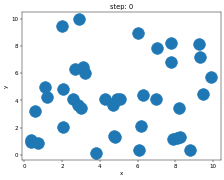

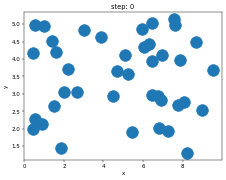

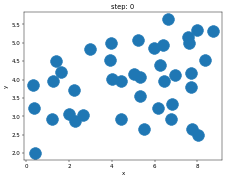

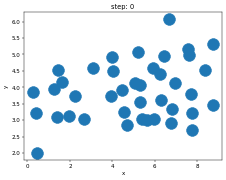

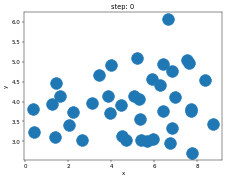

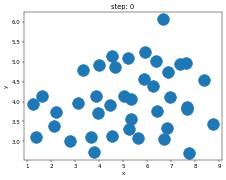

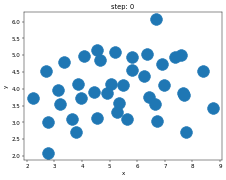

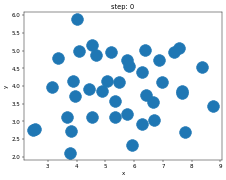

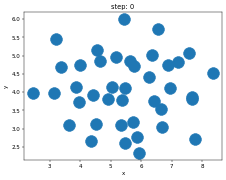

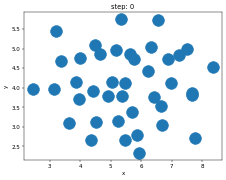

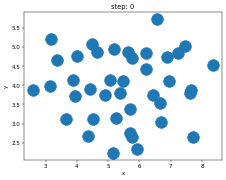

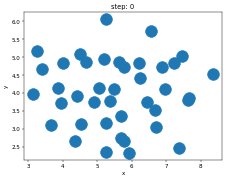

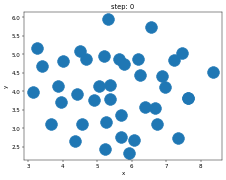

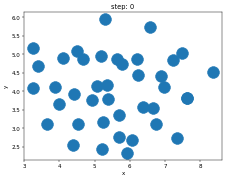

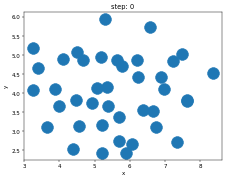

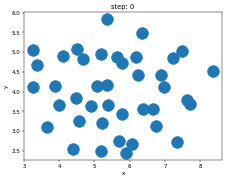

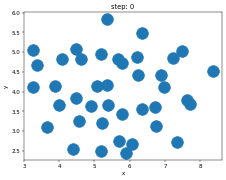

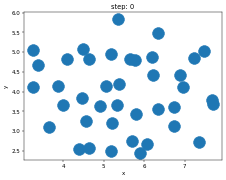

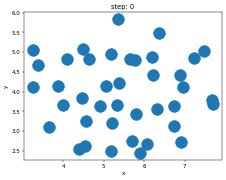

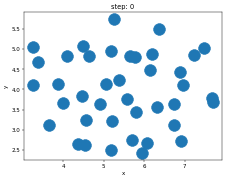

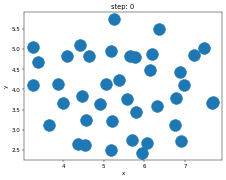

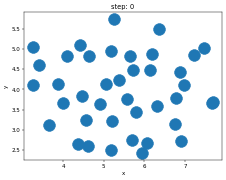

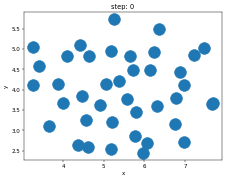

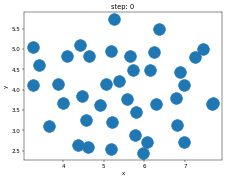

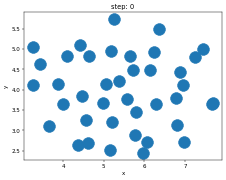

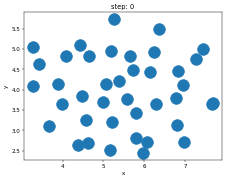

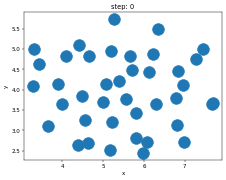

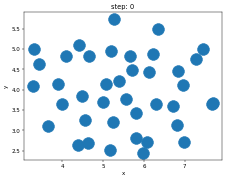

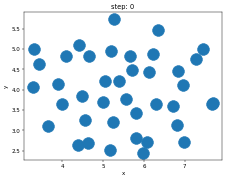

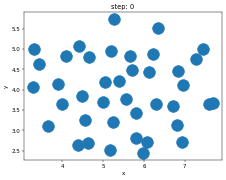

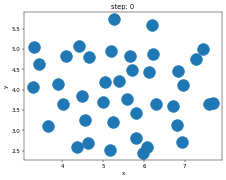

In [68]:
for i in range(Ndata + 5):
    start = i * 40
    end = min(start + 40, len(x))  # Prevent index out of range

    if start >= len(x):  # Stop if the start index is out of range
        break

    onex = x[start:end]
    oney = y[start:end]
    
    plt.figure(dpi=40)
    plt.scatter(onex, oney, s=450)
    plt.title(f"step: {step[start]}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

In [69]:
ET0_001 = pd.read_csv("./B3/energiesT0_001seed42.csv")
ET10 = pd.read_csv("./B3/energiesT10seed12.csv")
ET5000 = pd.read_csv("./B3/energiesT5000seed0xC0FFEE.csv")

In [70]:
def plot(energy, temp, seed, state):
    x = np.array(energy["STEP"])
    y = np.array(energy["E"])
    x = x[1:]
    y= y[1:]
    plt.figure(dpi=125)
    plt.scatter(x,y)
    plt.xlabel("step no.")
    plt.ylabel("configuration energy")
    plt.title(f"{state} phase at T = {temp} for seed {seed}")
    plt.show()

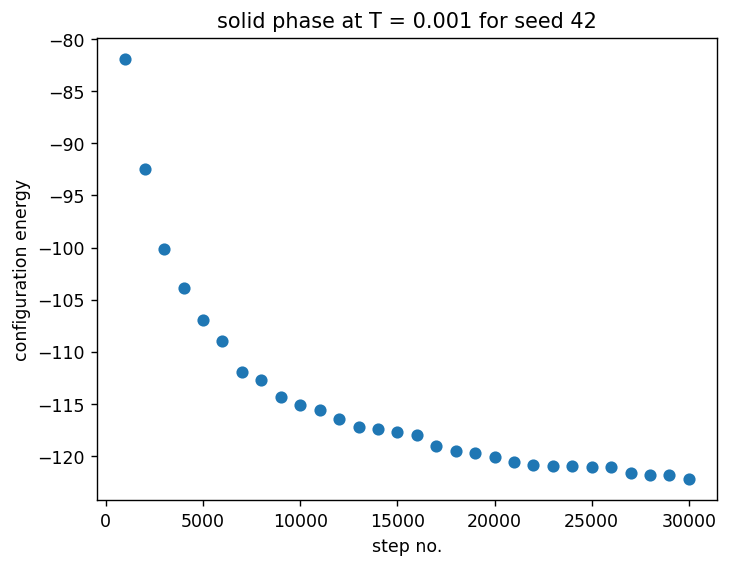

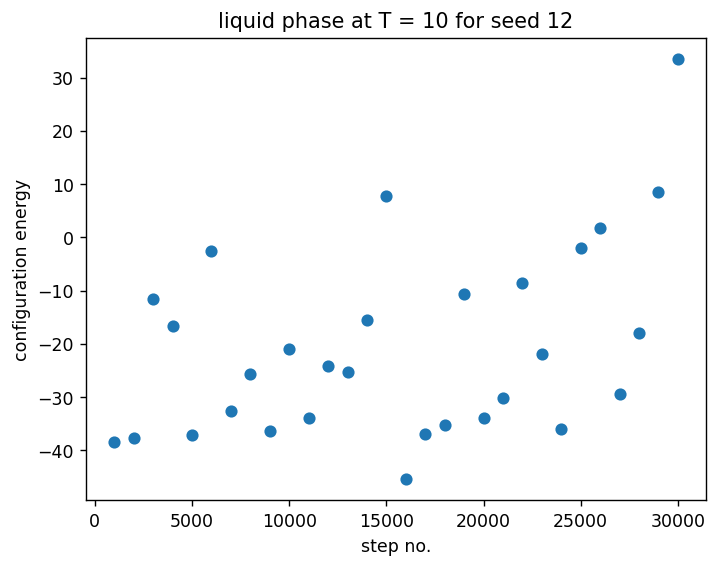

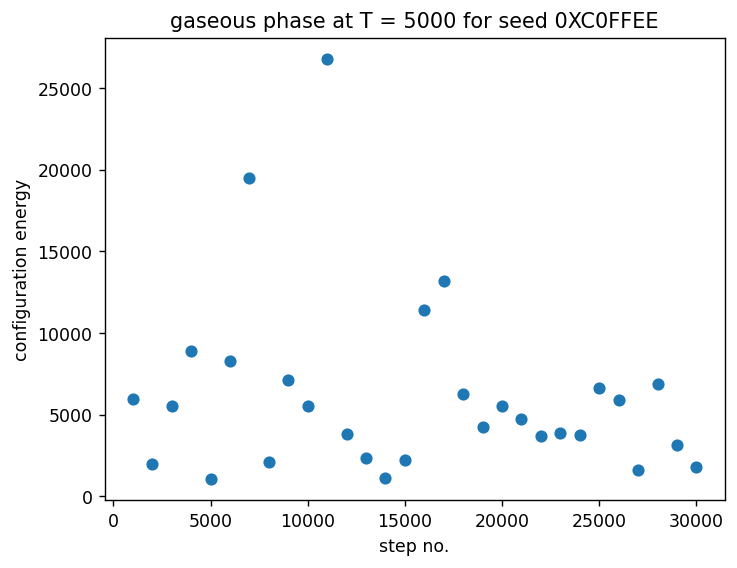

In [71]:
plot(ET0_001, 0.001, 42, "solid")
plot(ET10, 10, 12, "liquid")
plot(ET5000, 5000, "0XC0FFEE", "gaseous")

Bonus: Radial Distribution Function

In [72]:
def g(x,y):
    g = 0
    for i in range(len(x)):
        for j in range(i+1,len(x)):
            if()

SyntaxError: expected ':' (3794148527.py, line 5)

A4a)

/tmp/ipykernel_477/3399131467.py:15: RuntimeWarning: divide by zero encountered in log
  S_G += np.where(n > 0, n * p_up * np.log(p_up), 0)
/tmp/ipykernel_477/3399131467.py:15: RuntimeWarning: invalid value encountered in multiply
  S_G += np.where(n > 0, n * p_up * np.log(p_up), 0)
/tmp/ipykernel_477/3399131467.py:16: RuntimeWarning: divide by zero encountered in log
  S_G += np.where(N - n > 0, (N - n) * p_down * np.log(p_down), 0)
/tmp/ipykernel_477/3399131467.py:16: RuntimeWarning: invalid value encountered in multiply
  S_G += np.where(N - n > 0, (N - n) * p_down * np.log(p_down), 0)


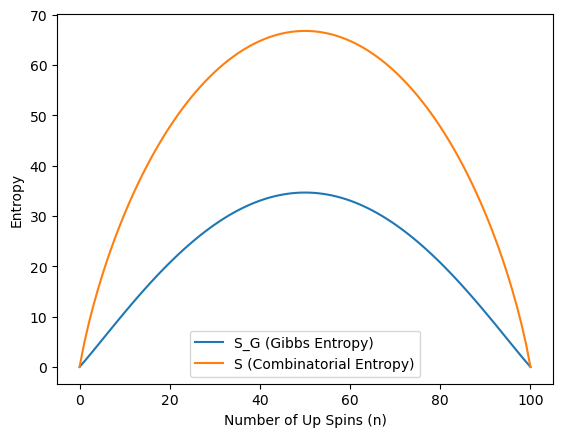

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import factorial, comb

N = 100
n = np.arange(0, N+1)

def S_G(n, N):
    p_up = n / N
    p_down = 1 - p_up
    S_G = np.zeros_like(n, dtype=float)

    # Avoid log(0) issues using np.where
    S_G += np.where(n > 0, n * p_up * np.log(p_up), 0)
    S_G += np.where(N - n > 0, (N - n) * p_down * np.log(p_down), 0)

    return -S_G

def S(n, N):
    return np.log(comb(N, n))  # Uses combinatorial log(N! / (n!(N-n)!))

plt.plot(n, S_G(n, N), label="S_G (Gibbs Entropy)")
plt.plot(n, S(n, N), label="S (Combinatorial Entropy)")
plt.xlabel("Number of Up Spins (n)")
plt.ylabel("Entropy")
plt.legend()
plt.show()
